<a href="https://colab.research.google.com/github/PSergey24/jupyter_notebooks/blob/main/NBA_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from matplotlib import pyplot as plt
from sklearn.metrics import plot_precision_recall_curve
import numpy as np
from sklearn.model_selection import GridSearchCV

In [71]:
df_all = pd.read_csv('drive/MyDrive/Colab Notebooks/data/dataset_9_6_2022.csv', sep=',')

In [100]:
df = df_all[(df_all['season'] > 2000) & (df_all['season'] < 2017)]

In [73]:
df.isna().sum()

id               0
link             0
date             0
season           0
pts_visitor      0
pts_home         0
id_visitor       0
id_home          0
ELO_visitor      0
ELO_home         1
t1p0_per         0
t1p1_per         0
t1p2_per         0
t1p3_per         2
t1p4_per        15
t1p5_per        48
t1p6_per        97
t1p7_per       239
t2p0_per         2
t2p1_per         2
t2p2_per         5
t2p3_per         9
t2p4_per        22
t2p5_per        46
t2p6_per       101
t2p7_per       277
visitor_b2b      0
home_b2b         0
Y                0
dtype: int64

In [74]:
df = df[df[['ELO_home', 't1p3_per', 't1p4_per', 't1p5_per', 't1p6_per', 't1p7_per', 't2p0_per', 't2p1_per', 't2p2_per', 't2p3_per', 't2p4_per', 't2p5_per', 't2p6_per', 't2p7_per']].notnull().all(1)]

In [75]:
df.isna().sum()

id             0
link           0
date           0
season         0
pts_visitor    0
pts_home       0
id_visitor     0
id_home        0
ELO_visitor    0
ELO_home       0
t1p0_per       0
t1p1_per       0
t1p2_per       0
t1p3_per       0
t1p4_per       0
t1p5_per       0
t1p6_per       0
t1p7_per       0
t2p0_per       0
t2p1_per       0
t2p2_per       0
t2p3_per       0
t2p4_per       0
t2p5_per       0
t2p6_per       0
t2p7_per       0
visitor_b2b    0
home_b2b       0
Y              0
dtype: int64

In [76]:
df = df.loc[:, 'ELO_visitor':]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20157 entries, 11743 to 32332
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ELO_visitor  20157 non-null  float64
 1   ELO_home     20157 non-null  float64
 2   t1p0_per     20157 non-null  float64
 3   t1p1_per     20157 non-null  float64
 4   t1p2_per     20157 non-null  float64
 5   t1p3_per     20157 non-null  float64
 6   t1p4_per     20157 non-null  float64
 7   t1p5_per     20157 non-null  float64
 8   t1p6_per     20157 non-null  float64
 9   t1p7_per     20157 non-null  float64
 10  t2p0_per     20157 non-null  float64
 11  t2p1_per     20157 non-null  float64
 12  t2p2_per     20157 non-null  float64
 13  t2p3_per     20157 non-null  float64
 14  t2p4_per     20157 non-null  float64
 15  t2p5_per     20157 non-null  float64
 16  t2p6_per     20157 non-null  float64
 17  t2p7_per     20157 non-null  float64
 18  visitor_b2b  20157 non-null  int64  
 19  

In [77]:
train_df, test_df = train_test_split(df, test_size=2000)

In [78]:
train_df.head(3)

,ELO_visitor,ELO_home,t1p0_per,t1p1_per,t1p2_per,t1p3_per,t1p4_per,t1p5_per,t1p6_per,t1p7_per,...,t2p1_per,t2p2_per,t2p3_per,t2p4_per,t2p5_per,t2p6_per,t2p7_per,visitor_b2b,home_b2b,Y
16466,-0.012,0.215,0.697,0.614,0.503,0.464,0.411,0.174,0.166,0.079,...,0.648,0.350,0.343,0.333,0.289,0.234,0.214,1,0,0
19920,0.194,0.268,0.806,0.525,0.394,0.373,0.314,0.299,0.265,0.247,...,0.472,0.390,0.317,0.313,0.296,0.249,0.162,0,0,0
21199,-0.536,-0.181,0.721,0.539,0.533,0.423,0.233,0.232,0.219,0.078,...,0.347,0.329,0.260,0.206,0.202,0.180,0.177,0,0,0


In [79]:
features = train_df.loc[:, 'ELO_visitor':'home_b2b']
features.head(5)

,ELO_visitor,ELO_home,t1p0_per,t1p1_per,t1p2_per,t1p3_per,t1p4_per,t1p5_per,t1p6_per,t1p7_per,t2p0_per,t2p1_per,t2p2_per,t2p3_per,t2p4_per,t2p5_per,t2p6_per,t2p7_per,visitor_b2b,home_b2b
16466,-0.012,0.215,0.697,0.614,0.503,0.464,0.411,0.174,0.166,0.079,1.000,0.648,0.350,0.343,0.333,0.289,0.234,0.214,1,0
19920,0.194,0.268,0.806,0.525,0.394,0.373,0.314,0.299,0.265,0.247,1.000,0.472,0.390,0.317,0.313,0.296,0.249,0.162,0,0
21199,-0.536,-0.181,0.721,0.539,0.533,0.423,0.233,0.232,0.219,0.078,0.419,0.347,0.329,0.260,0.206,0.202,0.180,0.177,0,0
14697,-0.270,0.056,0.732,0.676,0.507,0.461,0.389,0.386,0.269,0.265,0.610,0.474,0.294,0.283,0.236,0.197,0.168,0.141,0,0
19772,0.047,0.443,0.533,0.476,0.438,0.436,0.434,0.273,0.251,0.196,0.595,0.588,0.545,0.544,0.436,0.360,0.269,0.139,1,0


In [80]:
Y = train_df.loc[:, 'Y']
Y.head(5)

16466    0
19920    0
21199    0
14697    0
19772    0
Name: Y, dtype: int64

In [81]:
model = LogisticRegression(random_state=0)
model.fit(features, Y)

LogisticRegression(random_state=0)

In [82]:
test_features = test_df.loc[:, 'ELO_visitor':'home_b2b']
result = test_df.loc[:, 'Y']
model.predict(test_features[0:10]), result[0:10]

(array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0]), 21490    0
 32285    1
 20103    0
 12076    1
 18378    1
 18764    0
 17297    0
 14450    0
 23070    0
 29792    1
 Name: Y, dtype: int64)

In [83]:
model_pipeline = Pipeline(
    [
        ('model', LogisticRegression(random_state=0))
    ]
)

In [84]:
model_pipeline.fit(features, Y)

Pipeline(steps=[('model', LogisticRegression(random_state=0))])

In [85]:
precision_score(y_true=result, y_pred=model_pipeline.predict(test_features))

0.6371681415929203

In [86]:
recall_score(y_true=result, y_pred=model_pipeline.predict(test_features))

0.44776119402985076

In [87]:
prec, rec, thresholds = precision_recall_curve(y_true=result, probas_pred=model_pipeline.predict_proba(test_features)[:, 1])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


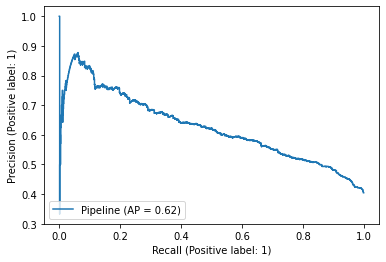

In [88]:
plot_precision_recall_curve(estimator=model_pipeline, X=test_features, y=result)

In [89]:
np.where(prec > 0.75)

(array([1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786,
        1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797,
        1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808,
        1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819,
        1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830,
        1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841,
        1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852,
        1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863,
        1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874,
        1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885,
        1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896,
        1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907,
        1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918,
        1919, 1920, 1921, 1922, 1923, 

In [90]:
thresholds[1776]

0.6562599162507001

In [91]:
precision_score(y_true=result, y_pred=model_pipeline.predict_proba(test_features)[:, 1] > thresholds[1776])

0.7571428571428571

In [92]:
recall_score(y_true=result, y_pred=model_pipeline.predict_proba(test_features)[:, 1] > thresholds[1776])

0.19776119402985073

In [95]:
grid_pipeline = Pipeline(
    [
        ('model', 
          GridSearchCV(
            LogisticRegression(random_state=0, max_iter=5000),
            param_grid={'C': [0.1, 1, 10.]},
            cv=3,
            verbose=4
            )
        )
    ]
)

In [96]:
grid_pipeline.fit(features, Y)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END .............................C=0.1;, score=0.678 total time=   0.1s
[CV 2/3] END .............................C=0.1;, score=0.672 total time=   0.1s
[CV 3/3] END .............................C=0.1;, score=0.677 total time=   0.1s
[CV 1/3] END ...............................C=1;, score=0.675 total time=   0.2s
[CV 2/3] END ...............................C=1;, score=0.670 total time=   0.2s
[CV 3/3] END ...............................C=1;, score=0.676 total time=   0.2s
[CV 1/3] END ............................C=10.0;, score=0.675 total time=   0.2s
[CV 2/3] END ............................C=10.0;, score=0.669 total time=   0.3s
[CV 3/3] END ............................C=10.0;, score=0.676 total time=   0.3s


Pipeline(steps=[('model',
                 GridSearchCV(cv=3,
                              estimator=LogisticRegression(max_iter=5000,
                                                           random_state=0),
                              param_grid={'C': [0.1, 1, 10.0]}, verbose=4))])

In [137]:
franchises = {1: 'Atlanta Hawks', 2: 'Boston Celtics', 3: 'Brooklyn Nets', 4: 'Charlotte Hornets', 5: 'Chicago Bulls', 6: 'Cleveland Cavaliers', 7: 'Dallas Mavericks', 8: 'Denver Nuggets', 9: 'Detroit Pistons', 10: 'Golden State Warriors', 11: 'Houston Rockets', 12: 'Indiana Pacers', 13: 'Los Angeles Clippers', 14: 'Los Angeles Lakers', 15: 'Memphis Grizzlies', 16: 'Miami Heat', 17: 'Milwaukee Bucks', 18: 'Minnesota Timberwolves', 19: 'New Orleans Pelicans', 20: 'New York Knicks', 21: 'Oklahoma City Thunder', 22: 'Orlando Magic', 23: 'Philadelphia 76ers', 24: 'Phoenix Suns', 25: 'Portland Trail Blazers', 26: 'Sacramento Kings', 27: 'San Antonio Spurs', 28: 'Toronto Raptors', 29: 'Utah Jazz', 30: 'Washington Wizards', 31: 'Anderson Packers', 32: 'Baltimore Bullets', 33: 'Chicago Stags', 34: 'Cleveland Rebels', 35: 'Denver Nuggets', 36: 'Detroit Falcons', 37: 'Indianapolis Jets', 38: 'Indianapolis Olympians', 39: 'Kentucky Colonels', 40: 'Memphis Sounds', 41: 'Pittsburgh Condors', 42: 'Pittsburgh Ironmen', 43: 'Providence Steam Rollers', 44: 'San Diego Sails', 45: 'Sheboygan Red Skins', 46: 'Spirits of St. Louis', 47: 'St. Louis Bombers', 48: 'The Floridians', 49: 'Toronto Huskies', 50: 'Utah Stars', 51: 'Virginia Squires', 52: 'Washington Capitols', 53: 'Waterloo Hawks'}
def get_key(d, value):
    for k, v in d.items():
        if v == value:
            return k

In [114]:
odds = pd.read_csv('drive/MyDrive/Colab Notebooks/data/odds.csv', sep='\t')

In [98]:
df_validate = df_all[df_all['season'] > 2016]

In [102]:
df_validate = df_validate[df_validate[['ELO_home', 't1p3_per', 't1p4_per', 't1p5_per', 't1p6_per', 't1p7_per', 't2p0_per', 't2p1_per', 't2p2_per', 't2p3_per', 't2p4_per', 't2p5_per', 't2p6_per', 't2p7_per']].notnull().all(1)]

In [125]:
df_validate_features = df_validate.loc[:, 'ELO_visitor':'home_b2b']
df_validate_y = df_validate.loc[:, 'Y']
df_validate_y.head(5)

32344    1
32348    1
32349    1
32350    1
32351    0
Name: Y, dtype: int64

In [108]:
res = model_pipeline.predict_proba(df_validate_features)[:, 1] > thresholds[1776]
res

array([False, False,  True, ..., False, False, False])

In [115]:
odds.head(10)

,Unnamed: 0,season,date,time,home,visitor,home_score,visitor_score,home_odd,visitor_odd,info
0,0,2017,12 Jun 2017,21:00,Golden State Warriors,Cleveland Cavaliers,129.0,120.0,1.26,4.19,NaN
1,1,2017,09 Jun 2017,21:00,Cleveland Cavaliers,Golden State Warriors,137.0,116.0,2.67,1.52,NaN
2,2,2017,07 Jun 2017,21:00,Cleveland Cavaliers,Golden State Warriors,113.0,118.0,2.39,1.64,NaN
3,3,2017,04 Jun 2017,20:00,Golden State Warriors,Cleveland Cavaliers,132.0,113.0,1.24,4.46,NaN
4,4,2017,01 Jun 2017,21:00,Golden State Warriors,Cleveland Cavaliers,113.0,91.0,1.32,3.65,NaN
5,5,2017,25 May 2017,20:30,Boston Celtics,Cleveland Cavaliers,102.0,135.0,5.00,1.23,NaN
6,6,2017,23 May 2017,20:30,Cleveland Cavaliers,Boston Celtics,112.0,99.0,1.07,13.00,NaN
7,7,2017,22 May 2017,21:00,San Antonio Spurs,Golden State Warriors,115.0,129.0,6.05,1.18,NaN
8,8,2017,21 May 2017,20:30,Cleveland Cavaliers,Boston Celtics,108.0,111.0,1.05,17.00,NaN
9,9,2017,20 May 2017,21:00,San Antonio Spurs,Golden State Warriors,108.0,120.0,4.86,1.24,NaN


In [184]:
real_res = df_validate_y.tolist()
bet_size = 100
total_bet = 0
total_win = 0

step = []
money = []
current = 0
# df_validate[(df_validate['id_visitor'] == 2) & (df_validate['id_home'] == 4)]
for i, prediction in enumerate(res):
  visitor_odd = odds.loc[i, 'visitor_odd']
  home_odd = odds.loc[i, 'home_odd']
  if home_odd == '-' or visitor_odd == '-':
    continue

  id_visitor = get_key(franchises, odds.loc[i, 'visitor'])
  id_home = get_key(franchises, odds.loc[i, 'home'])
  visitor_score = int(odds.loc[i, 'visitor_score'])
  home_score = int(odds.loc[i, 'home_score'])
  

  # print(id_visitor, id_home, visitor_score, home_score)
  game = df_validate[(id_visitor == df_validate['id_visitor']) & (id_home == df_validate['id_home']) & (home_score == df_validate['pts_home']) & (visitor_score == df_validate['pts_visitor'])]
  # print(game)
  
  if bool(real_res[i]) == prediction:
    if prediction is True:
      total_win += bet_size * float(visitor_odd)
      current += bet_size * float(visitor_odd)
    else:
      total_win += bet_size * float(home_odd)
      current += bet_size * float(home_odd)

  total_bet += bet_size
  current -= bet_size
  money.append(current)
  step.append(i)

print(f'ROI = {total_win/total_bet}, count_bets = {total_bet/bet_size}, wins = {total_win}, bets = {total_bet}, cash = {total_win - total_bet}')

ROI = 1.21320415879017, count_bets = 7406.0, wins = 898499.0, bets = 740600, cash = 157899.0


Text(0, 0.5, 'money')

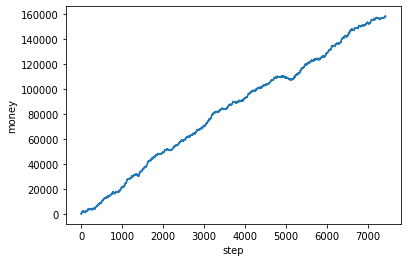

In [182]:
plt.plot(step, money)


plt.xlabel('step')
plt.ylabel('money')